/var/folders/2t/dyqmr9t94ms0drz2srwq25540000gn/T/ipykernel_22530/3005378066.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_features['TotalValue'].fillna(0, inplace=True)
/var/folders/2t/dyqmr9t94ms0drz2srwq25540000gn/T/ipykernel_22530/3005378066.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

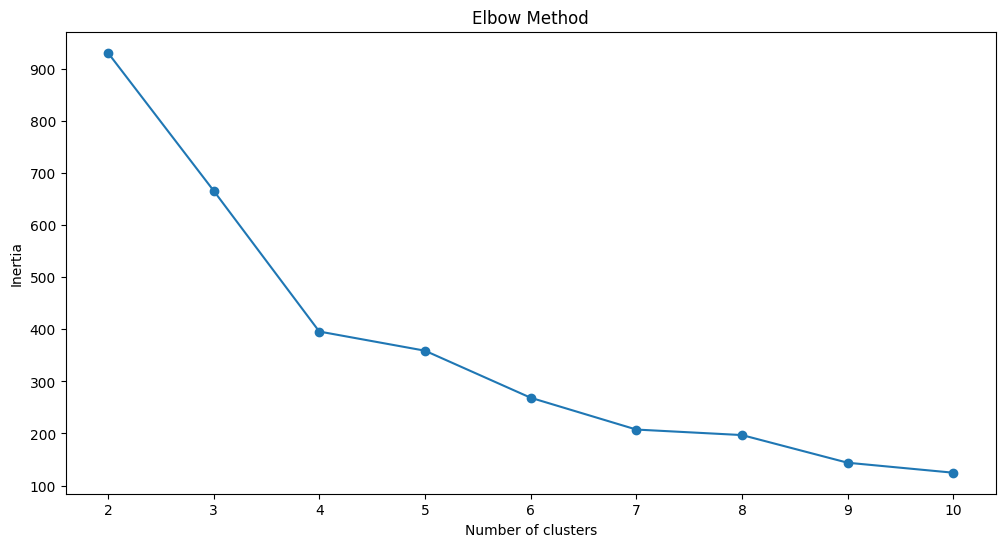

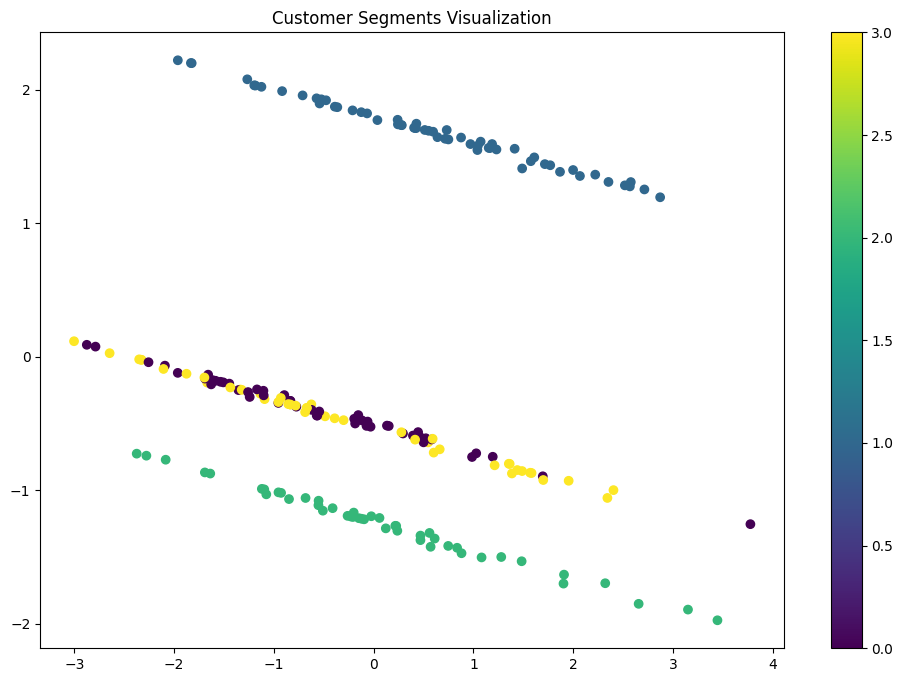

Number of clusters: 4
Davies-Bouldin Index: 0.75738042833301


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Prepare customer features
customer_features = customers.merge(transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}), on='CustomerID', how='left')

customer_features['TotalValue'].fillna(0, inplace=True)
customer_features['TransactionID'].fillna(0, inplace=True)

# Encode categorical variables
customer_features = pd.get_dummies(customer_features, columns=['Region'])

# Select features for similarity calculation
features = ['TotalValue', 'TransactionID'] + [col for col in customer_features.columns if col.startswith('Region_')]

# Normalize features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[features])

# Calculate similarity matrix
similarity_matrix = cosine_similarity(customer_features_scaled)

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Prepare data for clustering
cluster_data = customer_features[features].copy()

# Normalize data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Elbow method to find optimal number of clusters
inertias = []
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    inertias.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(cluster_data_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal number of clusters (let's say it's 4 for this example)
optimal_k = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Calculate DB Index
db_index = davies_bouldin_score(cluster_data_scaled, cluster_labels)

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cluster_data_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Customer Segments Visualization')
plt.colorbar(scatter)
plt.show()

print(f"Number of clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {db_index}")


In [11]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.cluster import KMeans

# Assuming you have already performed the clustering and have:
# cluster_data_scaled: your scaled data used for clustering
# optimal_k: the optimal number of clusters you determined

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Calculate DB Index
db_index = davies_bouldin_score(cluster_data_scaled, cluster_labels)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(cluster_data_scaled, cluster_labels)

print(f"Number of clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")


Number of clusters: 4
Davies-Bouldin Index: 0.757
Silhouette Score: 0.551
